In [1]:
# Importing the libraries I will use for this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# Reading in the data

df = pd.read_csv(r'C:\Users\parri\Downloads\movies.csv')

In [3]:
# Looking at the data

df.head()

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
0,Friday the 13th,R,Horror,1980,1980-09-05,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
1,Raging Bull,R,Biography,1980,1980-12-19,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
2,The Long Riders,R,Biography,1980,1980-05-16,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0
3,Any Which Way You Can,PG,Action,1980,1980-12-17,18000.0,Buddy Van Horn,Stanford Sherman,Clint Eastwood,United States,15000000.0,70687344.0,The Malpaso Company,116.0
4,The Gods Must Be Crazy,PG,Adventure,1980,1984-10-26,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000.0,30031783.0,C.A.T. Films,109.0


In [4]:
# Checking for missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 29%
gross - 3%
company - 0%
runtime - 0%


In [5]:
# Cleaning the data

df = df.dropna()

In [6]:
# Dropping duplicates

df.drop_duplicates()

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime
0,Friday the 13th,R,Horror,1980,1980-09-05,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
1,Raging Bull,R,Biography,1980,1980-12-19,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
2,The Long Riders,R,Biography,1980,1980-05-16,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0
3,Any Which Way You Can,PG,Action,1980,1980-12-17,18000.0,Buddy Van Horn,Stanford Sherman,Clint Eastwood,United States,15000000.0,70687344.0,The Malpaso Company,116.0
4,The Gods Must Be Crazy,PG,Adventure,1980,1984-10-26,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000.0,30031783.0,C.A.T. Films,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Bad Boys for Life,R,Action,2020,2020-01-17,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
6008,Sonic the Hedgehog,PG,Action,2020,2020-02-14,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
6009,Dolittle,PG,Adventure,2020,2020-01-17,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
6010,The Call of the Wild,PG,Adventure,2020,2020-02-21,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [7]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [8]:
# Changing the data type of columns
# Some of the year columns and released have different years, we will splice the released date and use that year.

df['correctyear'] = df['released'].astype(str).str[:4]

df

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,Friday the 13th,R,Horror,1980,1980-09-05,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,1980
1,Raging Bull,R,Biography,1980,1980-12-19,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,1980
2,The Long Riders,R,Biography,1980,1980-05-16,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,1980
3,Any Which Way You Can,PG,Action,1980,1980-12-17,18000.0,Buddy Van Horn,Stanford Sherman,Clint Eastwood,United States,15000000.0,70687344.0,The Malpaso Company,116.0,1980
4,The Gods Must Be Crazy,PG,Adventure,1980,1984-10-26,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000.0,30031783.0,C.A.T. Films,109.0,1984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Bad Boys for Life,R,Action,2020,2020-01-17,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020
6008,Sonic the Hedgehog,PG,Action,2020,2020-02-14,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020
6009,Dolittle,PG,Adventure,2020,2020-01-17,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020
6010,The Call of the Wild,PG,Adventure,2020,2020-02-21,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020


In [12]:
# Ordering the Data

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
4306,Avatar,PG-13,Action,2009,2009-12-18,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
5846,Avengers: Endgame,PG-13,Action,2019,2019-04-26,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
2404,Titanic,PG-13,Drama,1997,1997-12-19,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
5252,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
5691,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Crimewave,PG-13,Comedy,1985,1986-04-25,5300.0,Sam Raimi,Ethan Coen,Louise Lasser,United States,3000000.0,5.101000e+03,Columbia Pictures,83.0,1986
4459,Tanner Hall,R,Drama,2009,2015-01-15,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,2015
2912,Ginger Snaps,Not Rated,Drama,2000,2001-11-05,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,2001
183,Parasite,R,Horror,1982,1982-12-03,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,1982


<AxesSubplot:>

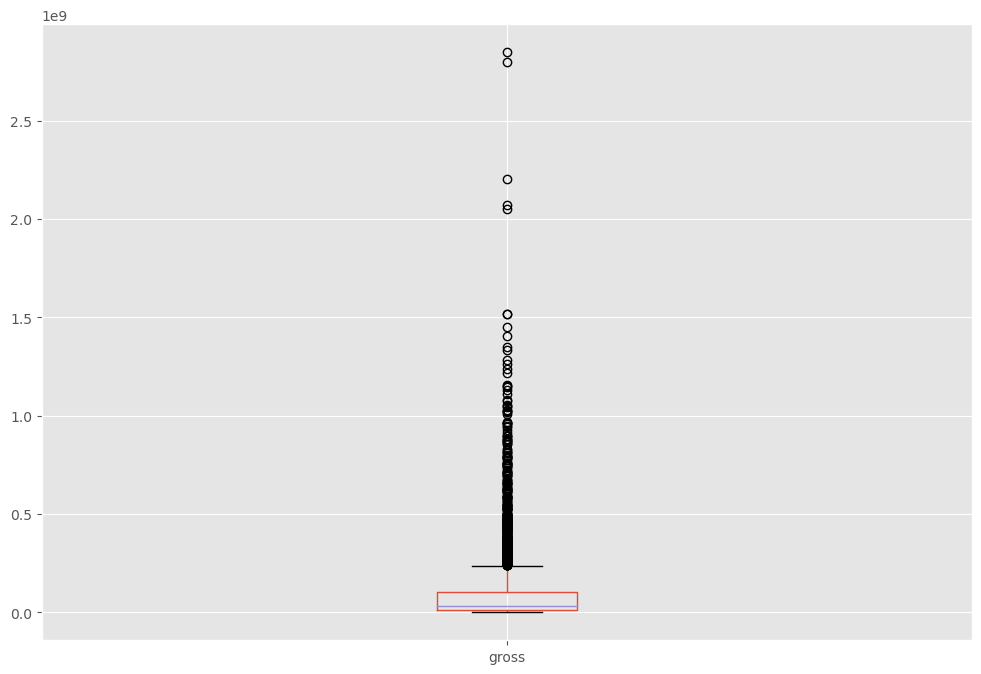

In [13]:
# Checking for Outliers

df.boxplot(column=['gross'])

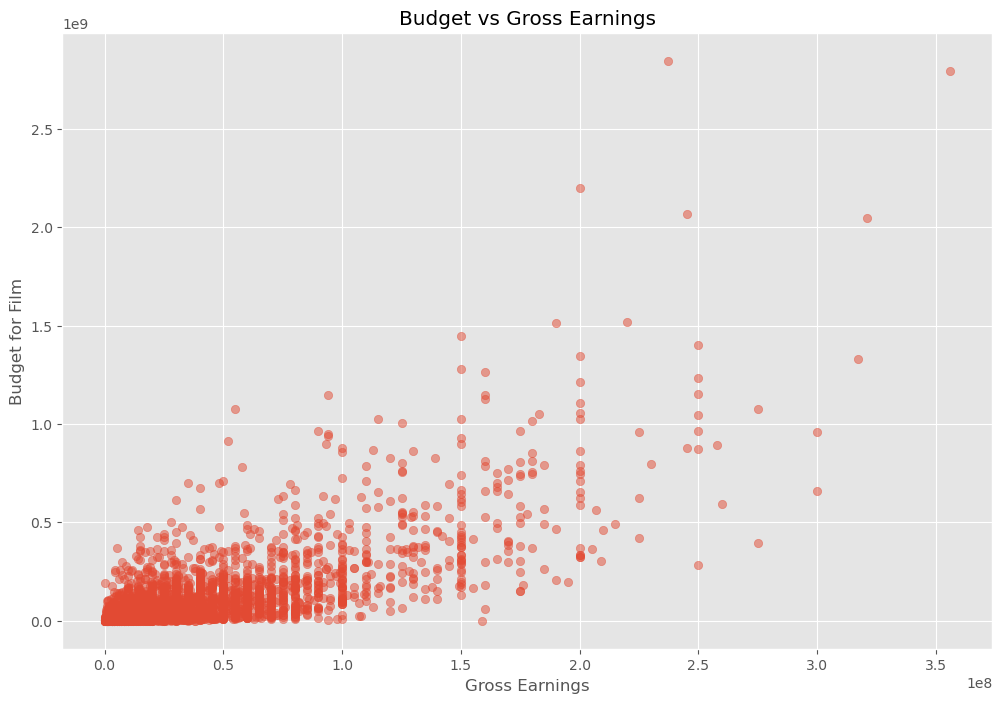

In [14]:
# Looking at correlation

plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

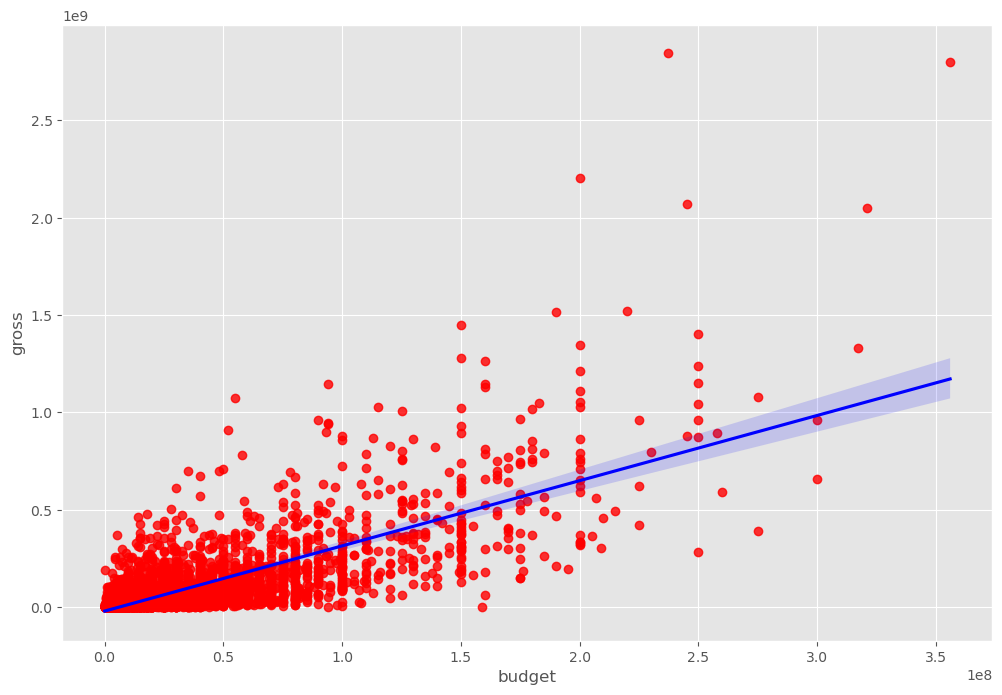

In [15]:
# Plot budget vs gross using seaborn

sns.regplot(x="budget", y="gross", data=df, scatter_kws = {"color": "red"},line_kws = {"color": "blue"})

In [16]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,year,votes,budget,gross,runtime
year,1.000000,0.227775,0.330178,0.278039,0.091519
votes,0.227775,1.000000,0.427663,0.612410,0.356359
budget,0.330178,0.427663,1.000000,0.741602,0.318132
gross,0.278039,0.612410,0.741602,1.000000,0.285549
runtime,0.091519,0.356359,0.318132,0.285549,1.000000


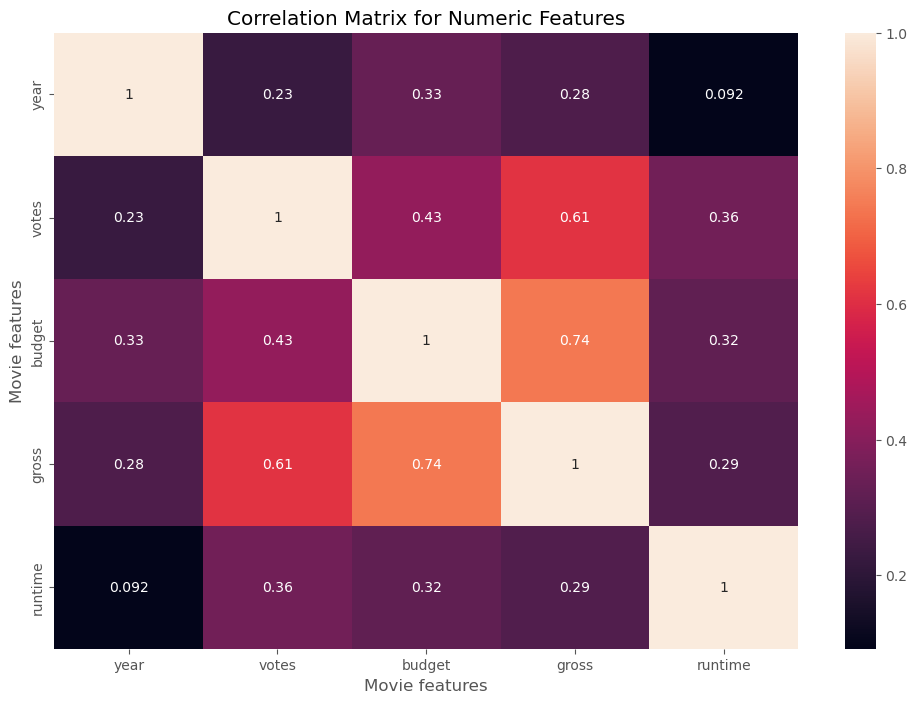

In [17]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [18]:
# Updating all columns to numeric values

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
4306,310,4,0,2009,1278,1100000.0,678,1062,1320,43,237000000.0,2.847246e+09,1183,162.0,29
5846,312,4,0,2019,1765,903000.0,90,421,1261,43,356000000.0,2.797501e+09,832,181.0,39
2404,3826,4,6,1997,694,1100000.0,678,1062,913,43,200000000.0,2.201647e+09,1183,194.0,17
5252,2843,4,0,2015,1604,876000.0,665,1517,305,43,245000000.0,2.069522e+09,797,138.0,35
5691,313,4,0,2018,1714,897000.0,90,421,1261,43,321000000.0,2.048360e+09,832,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,766,4,4,1985,188,5300.0,1507,792,945,43,3000000.0,5.101000e+03,387,83.0,6
4459,2953,5,6,2009,1559,3500.0,507,2455,1288,43,3000000.0,5.073000e+03,1186,96.0,35
2912,1264,2,6,2000,878,43000.0,823,1414,448,6,5000000.0,2.554000e+03,398,108.0,21
183,2271,5,9,1982,61,2300.0,225,46,1264,43,800000.0,2.270000e+03,494,85.0,2


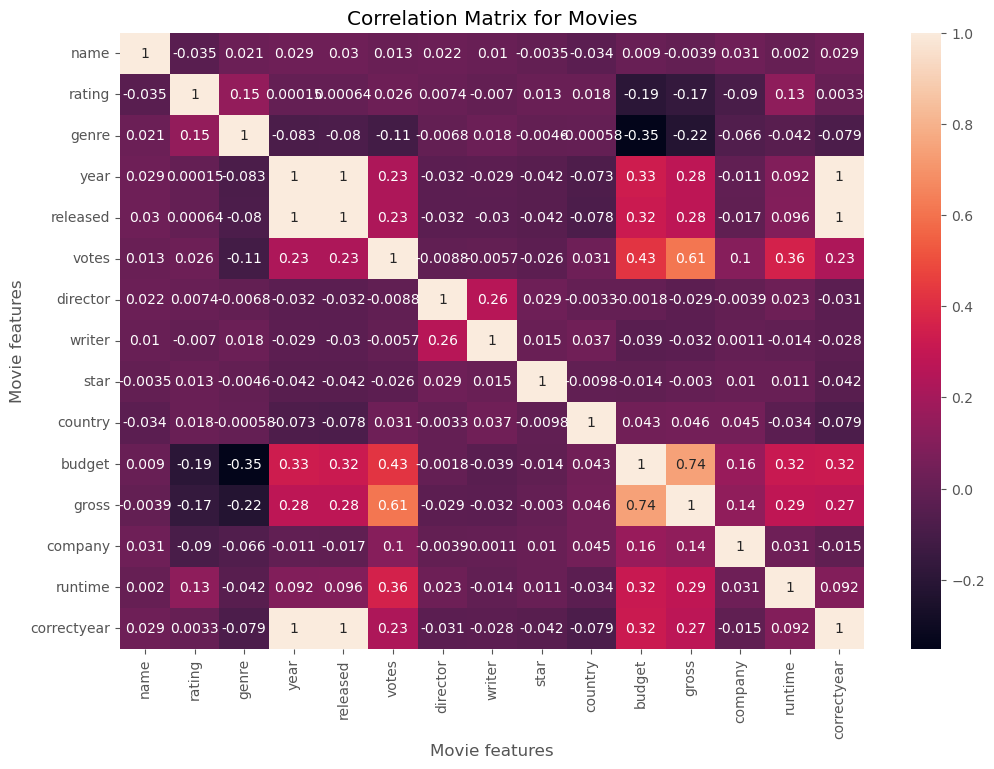

In [24]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [25]:
# Looking at the highest correlation

corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

print(corr_pairs)

name         name           1.000000
             rating        -0.035199
             genre          0.021224
             year           0.028812
             released       0.029970
                              ...   
correctyear  budget         0.322562
             gross          0.272703
             company       -0.015498
             runtime        0.092199
             correctyear    1.000000
Length: 225, dtype: float64


In [32]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.351819
budget       genre         -0.351819
genre        gross         -0.224968
gross        genre         -0.224968
rating       budget        -0.193708
budget       rating        -0.193708
gross        rating        -0.166113
rating       gross         -0.166113
votes        genre         -0.109998
genre        votes         -0.109998
company      rating        -0.089601
rating       company       -0.089601
year         genre         -0.083211
genre        year          -0.083211
released     genre         -0.079860
genre        released      -0.079860
country      correctyear   -0.079487
correctyear  country       -0.079487
             genre         -0.079141
genre        correctyear   -0.079141
country      released      -0.078488
released     country       -0.078488
country      year          -0.072766
year         country       -0.072766
genre        company       -0.065751
company      genre         -0.065751
genre        runtime       -0.042353
r

In [33]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr


gross        votes          0.612410
votes        gross          0.612410
gross        budget         0.741602
budget       gross          0.741602
released     year           0.997525
year         released       0.997525
correctyear  released       0.998380
released     correctyear    0.998380
year         correctyear    0.998888
correctyear  year           0.998888
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has no correlation